In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns# for data viz.
import geopandas
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png
/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv


# Image of <font color='yellow'>New York City</font>
It will be easy to Visualize data afterwards

![new york](https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png)

In [2]:
nyc_airbnb=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')# accessing the csv file

In [3]:
print(nyc_airbnb.shape)
nyc_airbnb.head(8)

(48895, 16)


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220

In [4]:
#checking DataType of every column in the dataset
nyc_airbnb.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Have to Separate the Numerical and Categorical Columns for Data Visualisation anad Data Analysis

In [5]:
numeric_nyc_airbnb=nyc_airbnb._get_numeric_data().columns# to Extract the names of columns that are Numeric

cat_nyc_airbnb=set(nyc_airbnb.columns)-set(numeric_nyc_airbnb) # To Extract the names of columns that are Categorical


## Finding Number of <font color='red'>Null Values</font> in each column of dataset

In [6]:
# to findout number of null values in Each column and suming their count
nyc_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
num_nyc_airbnb=nyc_airbnb._get_numeric_data()
#print(num_nyc_airbnb.head())


In [8]:
num_nyc_airbnb.replace([np.inf, -np.inf], np.nan).dropna(axis=1)# replaced all values of Infinity with Nan

# print(num_nyc_airbnb.dtypes)# checking datatypes of  numeric columns

# print("------------------------------------------------")
# print(num_nyc_airbnb.isnull().sum()) # This shows that oly reviews_per_month had missing values so we have to fill it up

#replacing all NaN values in 'reviews_per_month' with 0
num_nyc_airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
# print("------------------------------------------------")
# print(num_nyc_airbnb.reviews_per_month.isnull().sum()) # so we have removed all the Nan Values


## Very Useful Website to Learn About Feature Selection [here](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

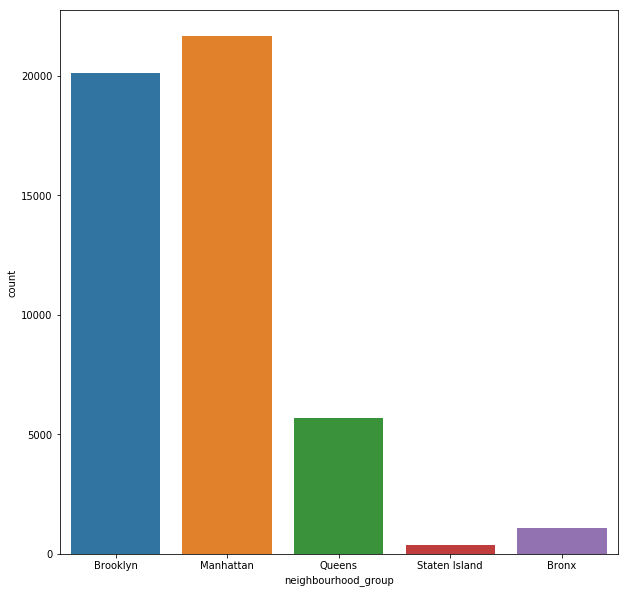

In [9]:
plt.figure(figsize=(10,10))
ax = sns.countplot(nyc_airbnb["neighbourhood_group"])

 This Shows that most of Airbnb Listings in <font color='yellow'> New York</font> are near  <font color='yellow'>Brooklyn</font> and <font color='yellow'> Manhattan</font>

In seaborn, the <font color='yellow'>**hue**</font> parameter determines which column in the data frame should be used for colour encoding. Using the [official](https://seaborn.pydata.org/generated/seaborn.lmplot.html) document 

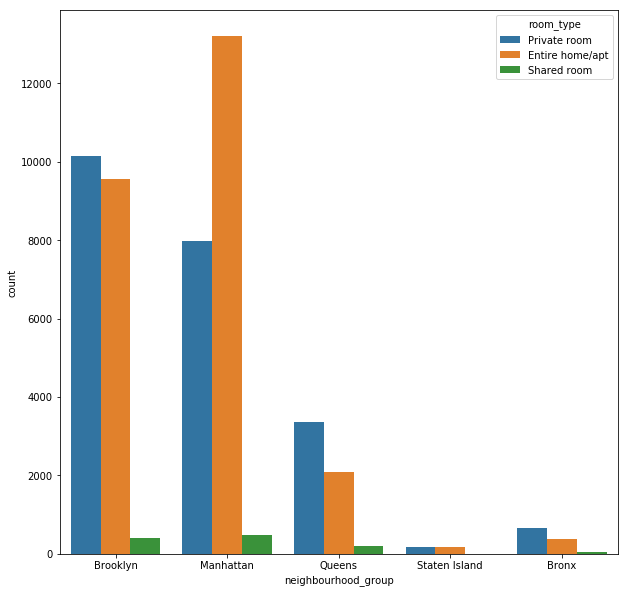

In [10]:
plt.figure(figsize=(10,10))
ax = sns.countplot(nyc_airbnb['neighbourhood_group'],hue=nyc_airbnb['room_type'])
# here hue parameter will give us 3 diffrent colors

Plot shows that Entire Home/Apartment are listed most near Manhattan while Private Rooms and Apartments Near Brooklyn are Nearly Equal

# Comparison of prices of <font color='SkyBlue'>Shared Rooms </font>

In [11]:
#Brooklyn
sub_1=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Brooklyn') & (nyc_airbnb['room_type']=='Shared room')]
price_sub1=num_nyc_airbnb['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Bronx') & (nyc_airbnb['room_type']=='Shared room')]
price_sub2=num_nyc_airbnb['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Staten Island') & (nyc_airbnb['room_type']=='Shared room')]
price_sub3=num_nyc_airbnb['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Queens') & (nyc_airbnb['room_type']=='Shared room')]
price_sub4=num_nyc_airbnb['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Manhattan') & (nyc_airbnb['room_type']=='Shared room')]
price_sub5=num_nyc_airbnb['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Private rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Private rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Private rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for accomodations near Queens

percentile_price_Manhattan=[] #percentile of prices for accomodations near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    


[Text(0, 0.5, 'Percentile Prices in U.S $'), Text(0.5, 0, 'Percentiles')]

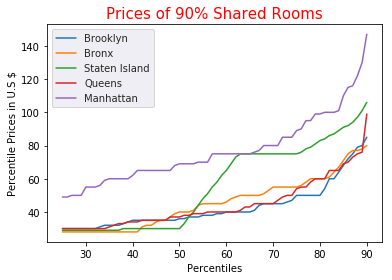

In [12]:

plt.title('Prices of 90% Shared Rooms',fontsize=15,color='Red')
sns.set_style("darkgrid")

# for i in range(2):

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

sd.set(xlabel='Percentiles', ylabel='Percentile Prices in U.S $')



## This Shows getting a shared room is cheapest near <font color='red'>Bronx</font> and costliest near <font color='red'>Manhattan</font>
## as 90%  of Shared rooms near <font color='red'>Bronx</font> and <font color='red'>Brooklyn</font> cost near <font color='yellow'>80 USD</font> whereas Near <font color='red'>Manhattan</font> it Actually near 150 USD

# Comparison of prices of <font color='SkyBlue'>Private Rooms </font>

In [13]:
#Brooklyn
sub_1=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Brooklyn') & (nyc_airbnb['room_type']=='Private room')]
price_sub1=num_nyc_airbnb['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Bronx') & (nyc_airbnb['room_type']=='Private room')]
price_sub2=num_nyc_airbnb['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Staten Island') & (nyc_airbnb['room_type']=='Private room')]
price_sub3=num_nyc_airbnb['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Queens') & (nyc_airbnb['room_type']=='Private room')]
price_sub4=num_nyc_airbnb['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Manhattan') & (nyc_airbnb['room_type']=='Private room')]
price_sub5=num_nyc_airbnb['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Private rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Private rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Private rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for accomodations near Queens

percentile_price_Manhattan=[] #percentile of prices for accomodations near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    


[Text(0, 0.5, 'Percentile Prices in U.S $'), Text(0.5, 0, 'Percentiles')]

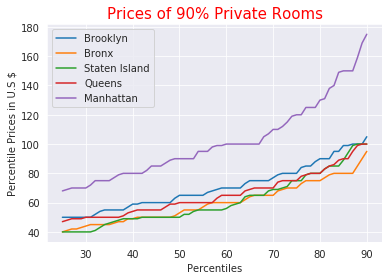

In [14]:

plt.title('Prices of 90% Private Rooms',fontsize=15,color='Red')
sns.set_style("darkgrid")

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

sd.set(xlabel='Percentiles', ylabel='Percentile Prices in U.S $')



## This Shows getting a shared room is cheapest near <font color='yellow'>Bronx</font> and costliest near <font color='yellow'>Manhattan</font>
## as 90%  of Shared rooms near <font color='yellow'>Bronx</font>,<font color='yellow'>Brooklyn</font>,<font color='yellow'>Staten Island</font>,<font color='yellow'>Queens</font> cost under or just above <font color='yellow'>100 USD</font> whereas Near <font color='yellow'>Manhattan</font> it Actually near 180 USD

# Comparison of prices of <font color='SkyBlue'>Entire home/apt </font>

In [15]:
room_type='Entire home/apt'
#Brooklyn
sub_1=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Brooklyn') & (nyc_airbnb['room_type']==room_type)]
price_sub1=num_nyc_airbnb['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Bronx') & (nyc_airbnb['room_type']==room_type)]
price_sub2=num_nyc_airbnb['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Staten Island') & (nyc_airbnb['room_type']==room_type)]
price_sub3=num_nyc_airbnb['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Queens') & (nyc_airbnb['room_type']==room_type)]
price_sub4=num_nyc_airbnb['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=nyc_airbnb.loc[(nyc_airbnb['neighbourhood_group'] == 'Manhattan') & (nyc_airbnb['room_type']==room_type)]
price_sub5=num_nyc_airbnb['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Private rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Private rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Private rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for accomodations near Queens

percentile_price_Manhattan=[] #percentile of prices for accomodations near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    


[Text(0, 0.5, 'Percentile Prices in U.S $'), Text(0.5, 0, 'Percentiles')]

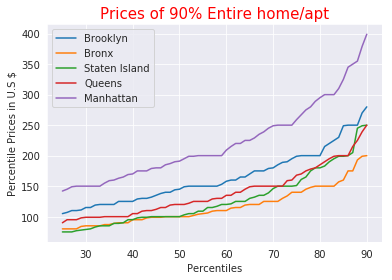

In [16]:

plt.title('Prices of 90% Entire home/apt',fontsize=15,color='Red')
sns.set_style("darkgrid")

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

sd.set(xlabel='Percentiles', ylabel='Percentile Prices in U.S $')



## Cost Of Entire Home or Apartment is Most Expensive near <font color='yellow'>Manhattan</font> averaging near 400 USD whereas <font color='yellow'>Bronx</font> has the cheapest option


# <font color='Yellow'>**Way to Create Subplots In Seaborn is in below cell**</font>
## Not part of project just for learning

In [17]:

# f, axes = plt.subplots(2,1,figsize = (10,10))
# sns.set_style("dark")
# # for i in range(2):
# sns.lineplot(x=pd.Series(percentiles_brooklyn),y=pd.Series(percentile_price_brooklyn),ax=axes[0])
# sns.lineplot(x=pd.Series(percentiles_Bronx),y=pd.Series(percentile_price_Bronx),ax=axes[1])


In [18]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(nyc_airbnb.longitude, nyc_airbnb.latitude)
geo_data = geopandas.GeoDataFrame(nyc_airbnb,crs=crs,geometry=geometry)

In [19]:
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

(-74.28337047811617, -73.67222994890714, 40.47514452612885, 40.93650364504154)

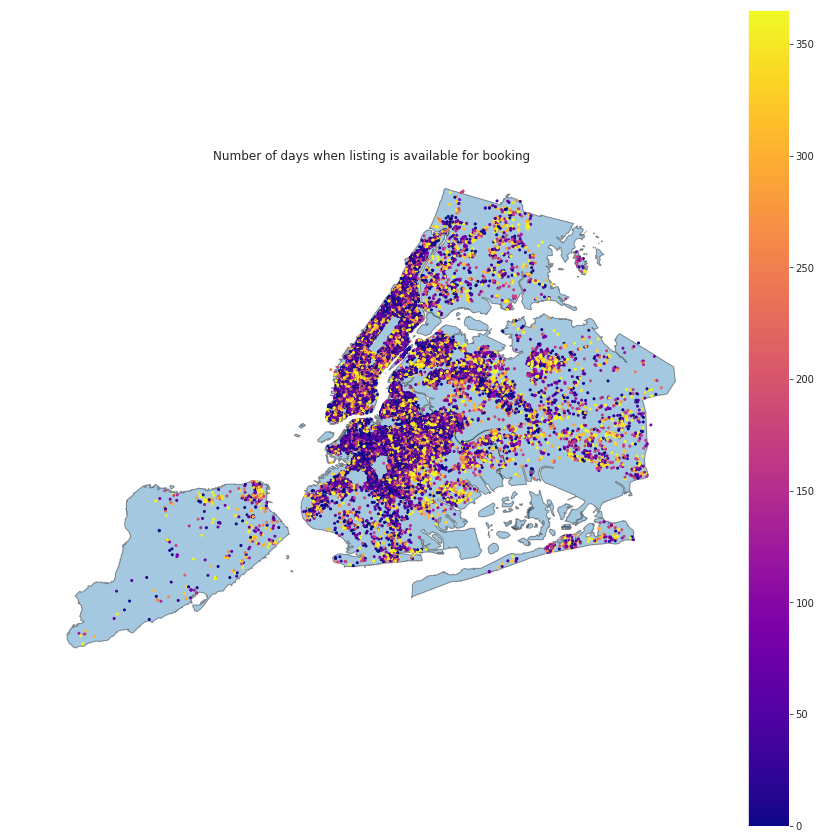

In [20]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='availability_365',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Number of days when listing is available for booking")
plt.axis('off')
